In [3]:
!pip install ucimlrepo

In [4]:
import sklearn
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [5]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
diabetes_130_us_hospitals_for_years_1999_2008 = fetch_ucirepo(id=296)

# data (as pandas dataframes)
X = diabetes_130_us_hospitals_for_years_1999_2008.data.features
y = diabetes_130_us_hospitals_for_years_1999_2008.data.targets

X.columns

/usr/local/lib/python3.10/dist-packages/ucimlrepo/fetch.py:97: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(data_url)


Index(['race', 'gender', 'age', 'weight', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'payer_code', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed'],
      dtype='object')

In [6]:
# Encode categorical labels into integers
enc = OrdinalEncoder()
transformed = enc.fit_transform(y)
y = transformed.flatten()
print(y)

[2. 1. 2. ... 2. 2. 2.]


In [7]:
# One hot encode sample dataset
# We use one hot encoding instead of categorical numbers because we don't want to introduce an ordinal relationship
# For example, we don't want to assign certain races, genders, etc. a higher value than one another
Xsample = pd.DataFrame()
enc = OneHotEncoder()

for x in ['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id','admission_source_id',
 'diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin',
 'repaglinide','glimepiride','acarbose','rosiglitazone','pioglitazone','glipizide','diabetesMed','change','insulin']:
  transformed = enc.fit_transform(X[[x]].to_numpy().reshape(-1, 1))
  Xsample.reset_index(drop=True, inplace=True)
  temp = pd.DataFrame(transformed.toarray())
  temp.reset_index(drop=True, inplace=True)
  temp.columns = enc.get_feature_names_out([x])
  Xsample = pd.concat([Xsample, temp],axis=1)

Xsample.head(5)

,race_AfricanAmerican,race_Asian,race_Caucasian,race_Hispanic,race_Other,race_nan,gender_Female,gender_Male,gender_Unknown/Invalid,age_[0-10),...,glipizide_Steady,glipizide_Up,diabetesMed_No,diabetesMed_Yes,change_Ch,change_No,insulin_Down,insulin_No,insulin_Steady,insulin_Up
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


In [8]:
# numericals = X[['time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient']]
# Xsample = X[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id','admission_source_id','payer_code',
#  'medical_specialty','diag_1','diag_2','diag_3','number_diagnoses','max_glu_serum','A1Cresult','metformin',
#  'repaglinide','glimepiride','acarbose','rosiglitazone','pioglitazone','glipizide','diabetesMed','change','insulin']]
# Xsample = pd.concat([Xsample, numericals],axis=1)
# Xsample.head(5)

In [9]:
 # Train test split
 X_train, X_test, y_train, y_test = train_test_split(Xsample, y, test_size=0.33, random_state=42)

In [10]:
#neural network

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [11]:
learning_rates = [0.0005,0.001,0.005,0.01]
err_curves = []

for lr in learning_rates:
    # Define the neural network model with more layers and dropout
    model = Sequential()
    model.add(Dense(256, activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dense(128, activation="relu"))
    model.add(Dense(64, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))  # Binary classification output

    # Compile the model with the specified learning rate
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])

    # Train the model
    history = model.fit(X_train, y_train, epochs=5, batch_size=256, validation_data=(X_test, y_test))

    # Collect the loss values from the training history
    loss_curve = history.history['loss']
    err_curves.append(loss_curve)



Epoch 1/5
267/267 [==============================] - 11s 37ms/step - loss: -6206.1284 - accuracy: 0.3474 - val_loss: -36543.4805 - val_accuracy: 0.3496
Epoch 2/5
267/267 [==============================] - 8s 31ms/step - loss: -306339.0312 - accuracy: 0.3491 - val_loss: -841890.0625 - val_accuracy: 0.3496
Epoch 3/5
267/267 [==============================] - 7s 27ms/step - loss: -2381907.5000 - accuracy: 0.3491 - val_loss: -4571220.5000 - val_accuracy: 0.3496
Epoch 4/5
267/267 [==============================] - 8s 32ms/step - loss: -8939150.0000 - accuracy: 0.3491 - val_loss: -14213338.0000 - val_accuracy: 0.3496
Epoch 5/5
267/267 [==============================] - 7s 26ms/step - loss: -23182106.0000 - accuracy: 0.3491 - val_loss: -32990690.0000 - val_accuracy: 0.3496
Epoch 1/5
267/267 [==============================] - 10s 33ms/step - loss: -93121.9609 - accuracy: 0.3483 - val_loss: -559329.0000 - val_accuracy: 0.3496
Epoch 2/5
267/267 [==============================] - 8s 31ms/step - l

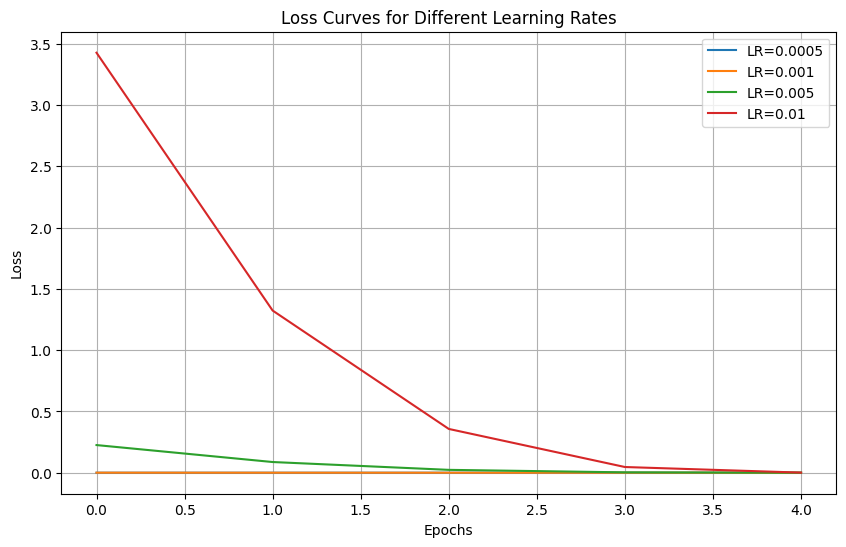

In [29]:
err_curves_divided = np.abs(np.array(err_curves)) / 1e12
for i in range(len(err_curves_divided)):
    err_curves_divided[i] = np.flip(err_curves_divided[i])
import matplotlib.pyplot as plt
# Plot the loss curves for different learning rates
plt.figure(figsize=(10, 6))
for i, lr in enumerate(learning_rates):
    plt.plot(err_curves_divided[i], label=f'LR={lr}')
plt.title('Loss Curves for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# from sklearn.neural_network import MLPClassifier
# learning_rates = [0.0005,0.001,0.005,0.01]
# err_curves = []

# for lr in learning_rates:

#   # Define the neural network model with more layers and dropout
#   model = MLPClassifier(hidden_layer_sizes = (64), learning_rate_init = lr,
#                         activation ='relu', solver ='sgd',
#                         batch_size=256,
#                         max_iter=100,
#                         n_iter_no_change=100)

#   # Train the model
#   model.fit(X_train, y_train,  validation_data=(X_test, y_test))

#   # Evaluate the model
#   loss, accuracy = model.evaluate(X_test, y_test)
#   print(f"Test Loss: {loss:.4f}")
#   print(f"Test Accuracy: {accuracy*100:.2f}%")

#   err_curves.append(model.loss_curve_)

In [ ]:
for i, curve in enumerate(err_curves):
  plt.plot(curve, label = learning_rates[i])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
clf = cv.results